In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import skimage.io
import skimage.feature
import skimage.transform

import os
from glob import glob
import re

%matplotlib inline

In [2]:
# read the folders in a list
folder = os.listdir('data')
print(folder)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


In [4]:
all_path =[]
for f in folder:
    all_path += glob('./data/{}/*.jpg'.format(f))
    

In [5]:
all_path

['./data/BearHead\\bearfrontal0001.jpg',
 './data/BearHead\\bearfrontal0002.jpg',
 './data/BearHead\\bearfrontal0003.jpg',
 './data/BearHead\\bearfrontal0004.jpg',
 './data/BearHead\\bearfrontal0005.jpg',
 './data/BearHead\\bearfrontal0006.jpg',
 './data/BearHead\\bearfrontal0007.jpg',
 './data/BearHead\\bearfrontal0008.jpg',
 './data/BearHead\\bearfrontal0009.jpg',
 './data/BearHead\\bearfrontal0010.jpg',
 './data/BearHead\\bearfrontal0011.jpg',
 './data/BearHead\\bearfrontal0012.jpg',
 './data/BearHead\\bearfrontal0013.jpg',
 './data/BearHead\\bearfrontal0014.jpg',
 './data/BearHead\\bearfrontal0015.jpg',
 './data/BearHead\\bearfrontal0016.jpg',
 './data/BearHead\\bearfrontal0017.jpg',
 './data/BearHead\\bearfrontal0018.jpg',
 './data/BearHead\\bearfrontal0019.jpg',
 './data/BearHead\\bearfrontal0020.jpg',
 './data/BearHead\\bearfrontal0021.jpg',
 './data/BearHead\\bearfrontal0022.jpg',
 './data/BearHead\\bearfrontal0023.jpg',
 './data/BearHead\\bearfrontal0024.jpg',
 './data/BearHea

In [23]:
# read all image and label
img_all = skimage.io.ImageCollection(all_path)

In [24]:
len(img_all)

2057

In [25]:
img_all.files

['./data/BearHead\\bearfrontal0001.jpg',
 './data/BearHead\\bearfrontal0002.jpg',
 './data/BearHead\\bearfrontal0003.jpg',
 './data/BearHead\\bearfrontal0004.jpg',
 './data/BearHead\\bearfrontal0005.jpg',
 './data/BearHead\\bearfrontal0006.jpg',
 './data/BearHead\\bearfrontal0007.jpg',
 './data/BearHead\\bearfrontal0008.jpg',
 './data/BearHead\\bearfrontal0009.jpg',
 './data/BearHead\\bearfrontal0010.jpg',
 './data/BearHead\\bearfrontal0011.jpg',
 './data/BearHead\\bearfrontal0012.jpg',
 './data/BearHead\\bearfrontal0013.jpg',
 './data/BearHead\\bearfrontal0014.jpg',
 './data/BearHead\\bearfrontal0015.jpg',
 './data/BearHead\\bearfrontal0016.jpg',
 './data/BearHead\\bearfrontal0017.jpg',
 './data/BearHead\\bearfrontal0018.jpg',
 './data/BearHead\\bearfrontal0019.jpg',
 './data/BearHead\\bearfrontal0020.jpg',
 './data/BearHead\\bearfrontal0021.jpg',
 './data/BearHead\\bearfrontal0022.jpg',
 './data/BearHead\\bearfrontal0023.jpg',
 './data/BearHead\\bearfrontal0024.jpg',
 './data/BearHea

In [33]:
# labeling
# extract text folder
def extract_label(text):
    try:
        label = re.search(r'./data/(.*?)Head\\',text).group(1)
    except:
        label = re.search(r'./data/(.*?)\\',text).group(1)
        
    return label.lower()

In [34]:
labels = list(map(extract_label,img_all.files))

In [36]:
len(labels)

2057

In [43]:
def buffer(io):
    return io

img_all_arrs = np.array(list(map(buffer,img_all)))
# img_all[2]

In [45]:
img_all_arrs.shape

(2057, 80, 80, 3)

In [46]:
data = dict()

data['description'] ='There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)'
data['data'] = img_all_arrs
data['target'] = labels
data['labels'] = set(labels)

In [48]:
# save the file in pickle
import pickle
import collections

In [49]:
pickle.dump(data,open('data_animals_head_20.pickle','wb'))

---

In [51]:
count_values = collections.Counter(data['target'])
count_values

Counter({'bear': 101,
         'cat': 159,
         'chicken': 100,
         'cow': 103,
         'deer': 103,
         'dog': 132,
         'duck': 103,
         'eagle': 100,
         'elephant': 100,
         'human': 100,
         'lion': 102,
         'monkey': 100,
         'mouse': 100,
         'natural': 8,
         'panda': 118,
         'pigeon': 115,
         'rabbit': 100,
         'sheep': 100,
         'tiger': 113,
         'wolf': 100})

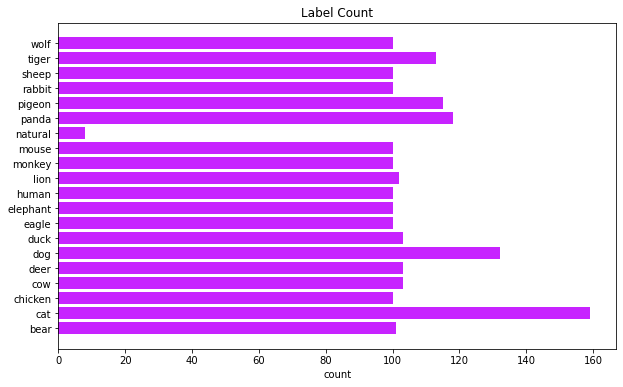

In [58]:
y_axis = list(count_values.keys())
values = count_values.values()
plt.figure(figsize=(10,6))
plt.barh(y_axis,values,color='#C723FF')
plt.xlabel('count')
plt.title('Label Count')
plt.show()

In [60]:
data['data'].shape

(2057, 80, 80, 3)

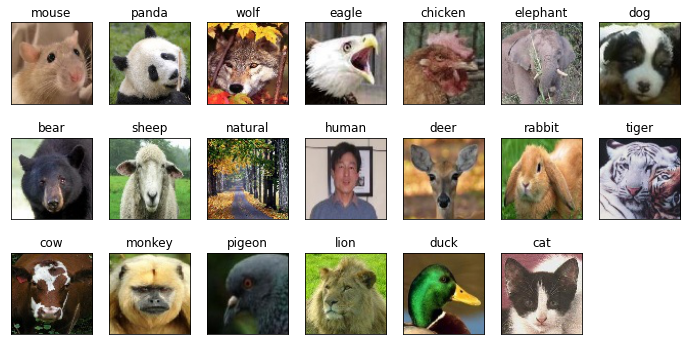

In [71]:
plt.figure(figsize=(12,6))
for i,c in enumerate(data['labels']):
    index = data['target'].index(c)
    img = data['data'][index]
    
    plt.subplot(3,7,i+1)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.title(c)
    
plt.show()